  Stored in directory: C:\Users\ivyzh\AppData\Local\pip\Cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Stored in directory: C:\Users\ivyzh\AppData\Local\pip\Cache\wheels\43\07\ac\7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: C:\Users\ivyzh\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse


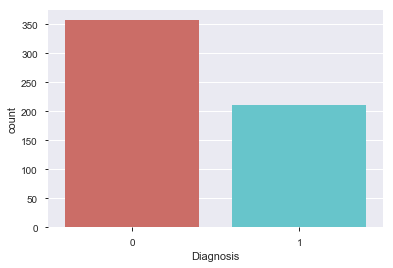

In [176]:
import pandas as pd
import numpy as np
import seaborn as sb

# Create a list to save the first 2 attributes 
first2 = ["ID","Diagnosis"]
# Create a list to save attribute for the loop
attribute = ["Radius","Texture","Perimeter","Area","Smoothness", "Compactness","Concavity","Concave","Symmetry","Fractal Dimension"]
stat = ["Mean ", "SD ", "Worst "]
# Assign the attributes to the columns by creating a loop 
names = first2 + [y+x for y in stat for x in attribute]
# Load the data
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data")
df.columns = names

df.Diagnosis.loc[df.Diagnosis == "B"] = 0
df.Diagnosis.loc[df.Diagnosis == "M"] = 1

#df.head()

# Check if there is any missing value
# df.isnull().sum()
sb.countplot(x='Diagnosis',data=df, palette='hls')

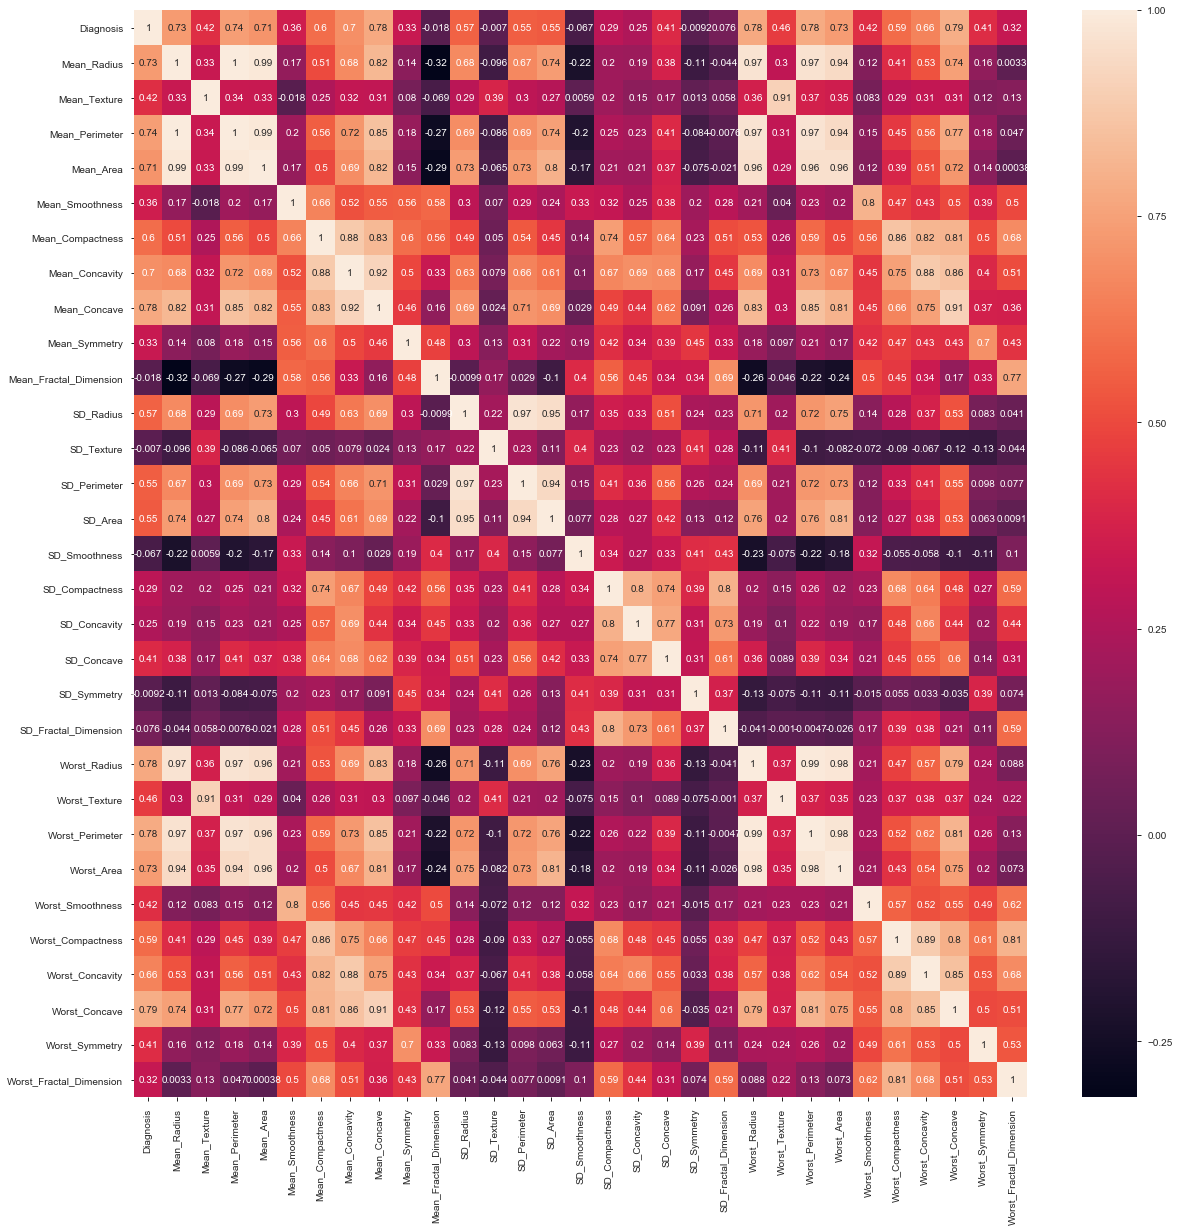

In [167]:
import seaborn as sns
from matplotlib import pyplot as plt
df_heat = df.iloc[:,1:]
corrmatrix = df_heat.corr()
top_correlated = corrmatrix.index
plt.figure(figsize = (20,20))
plot = sns.heatmap(df[top_correlated].corr(), annot = True)

# KNN (Took classnote as reference)

In [218]:
############################### Set up ########################################################
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn import neighbors, datasets,linear_model,metrics
from sklearn.metrics import confusion_matrix

# Retrieve variable of dataset
X = df.iloc[:, 2:]  
# Retrieve target variable of dataset
y = df.iloc[:,1]

print(X.head())
print(y.head())

   Mean Radius  Mean Texture  Mean Perimeter  Mean Area  Mean Smoothness  \
0        20.57         17.77          132.90     1326.0          0.08474   
1        19.69         21.25          130.00     1203.0          0.10960   
2        11.42         20.38           77.58      386.1          0.14250   
3        20.29         14.34          135.10     1297.0          0.10030   
4        12.45         15.70           82.57      477.1          0.12780   

   Mean Compactness  Mean Concavity  Mean Concave  Mean Symmetry  \
0           0.07864          0.0869       0.07017         0.1812   
1           0.15990          0.1974       0.12790         0.2069   
2           0.28390          0.2414       0.10520         0.2597   
3           0.13280          0.1980       0.10430         0.1809   
4           0.17000          0.1578       0.08089         0.2087   

   Mean Fractal Dimension  ...  Worst Radius  Worst Texture  Worst Perimeter  \
0                 0.05667  ...         24.99          

In [237]:
##########################################Split the Data#####################################
from sklearn.model_selection import train_test_split

# Splitting data into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

unique, c = np.unique(y,return_counts = True)
print('Labels counts in y:',dict(zip(unique,count)))
unique1, c1 = np.unique(y_train,return_counts = True)
print('Labels counts in y_train:', dict(zip(unique1,c1)))
unique2, c2 = np.unique(y_test,return_counts = True)
print('Labels counts in y_test:',dict(zip(unique2,c2)))

Labels counts in y: {0: 357, 1: 211}
Labels counts in y_train: {0: 250, 1: 147}
Labels counts in y_test: {0: 107, 1: 64}


In [238]:
############################################# Normalization #############################################
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
sc.fit(X_train) # Compute the mean and std to be used for later scaling.

X_train_std = sc.transform(X_train) # Perform standardization of train set X by centering and scaling
X_test_std = sc.transform(X_test) # Perform standardization of test set Xby centering and scaling

In [239]:
############################################# Train the Model #############################################
from sklearn import neighbors, datasets

# Set parameters of KNeighborsClassifier
knn = neighbors.KNeighborsClassifier(n_neighbors = 3, #n_neighbors is the k in the kNN
                           p = 2, # p = 2 for euclidean_distance
                           metric='minkowski') # metric : string or callable, default ‘minkowski’
                           # the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.

# Train the model      
knn = knn.fit(X_train_std, y_train)  

In [241]:
############################################# Evaluate the Model #############################################
# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics 
# and distance computations.
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report

# Estimate the predicted values by applying the kNN algorithm
y_pred = knn.predict(X_test_std)
y_pred_insample = knn.predict(X_train_std)

# Accuracy
print('Accuracy (out-of-sample): %.2f' % accuracy_score(y_test, y_pred))
print('Accuracy (in-sample): %.2f' % accuracy_score(y_train, y_pred_insample))

# F1 score
print('F1 score (out-of-sample): ', f1_score(y_test, y_pred, average='macro'))
print('F1 score (in-sample)    : ', f1_score(y_train, y_pred_insample, average='macro'))

# Kappa score
print('Kappa score (out-of-sample): ', cohen_kappa_score(y_test, y_pred))
print('Kappa score (in-sample)    : ', cohen_kappa_score(y_train, y_pred_insample))

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names = ["B","M"]))
print('Accuracy of k-NN', accuracy_score(y_test,y_pred))

Accuracy (out-of-sample): 0.96
Accuracy (in-sample): 0.99
F1 score (out-of-sample):  0.9555629802873371
F1 score (in-sample)    :  0.9863989859193532
Kappa score (out-of-sample):  0.9112083673318003
Kappa score (in-sample)    :  0.9728026306775365
              precision    recall  f1-score   support

           B       0.95      0.99      0.97       107
           M       0.98      0.91      0.94        64

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy of k-NN 0.9590643274853801


[[106   1]
 [  6  58]]


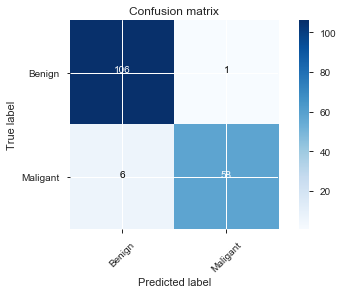

In [158]:
##################################### Confusion Matrix #####################################
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
   
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred) 
np.set_printoptions(precision=2)

# Plot the confusion matrix 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ["Benign", "Maligant"])
plt.show()

# Logistic Regression

In [159]:
print(X.columns)
list(X.columns).index('Mean_Radius')

Index(['Mean_Radius', 'Mean_Texture', 'Mean_Perimeter', 'Mean_Area',
       'Mean_Smoothness', 'Mean_Compactness', 'Mean_Concavity', 'Mean_Concave',
       'Mean_Symmetry', 'Mean_Fractal_Dimension', 'SD_Radius', 'SD_Texture',
       'SD_Perimeter', 'SD_Area', 'SD_Smoothness', 'SD_Compactness',
       'SD_Concavity', 'SD_Concave', 'SD_Symmetry', 'SD_Fractal_Dimension',
       'Worst_Radius', 'Worst_Texture', 'Worst_Perimeter', 'Worst_Area',
       'Worst_Smoothness', 'Worst_Compactness', 'Worst_Concavity',
       'Worst_Concave', 'Worst_Symmetry', 'Worst_Fractal_Dimension'],
      dtype='object')


0

In [236]:
#X_drop = X.drop(columns = ["Mean_Concavity","Mean_Perimeter","Mean_Radius","SD_Perimeter","SD_Radius","Worst_Area",
            #"Worst_Concave","Worst_Perimeter","Worst_Radius","Worst_Texture"])

############################################    Split the Data   ############################################
# Split validation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

#################################### Train the Logistic Regression Model ####################################
# We create an instance of the Classifier
clf = linear_model.LogisticRegression(C=1e8,
                                      tol = 1e-6, 
                                      penalty = 'l2') 
clf = clf.fit(X_train, y_train)
print('The weights of the attributes are:', clf.coef_)

#################################### Apply the Logistic Regression Model ####################################

y_pred = clf.predict(X_test)             # Classification prediction
y_pred_prob = clf.predict_proba(X_test)  # Class probabilities
print(y_pred[0], y_pred_prob[0], np.sum(y_pred_prob[0]))

################################### Evaluate the Logistic Regression Model ##################################

# Build a text report showing the main classification metrics (out-of-sample performance)
print(classification_report(y_test, y_pred, target_names=["B","M"]))
print('Accuracy of LR', accuracy_score(y_test,y_pred))

The weights of the attributes are: [[-1.45e+02 -8.38e+00  1.23e+01  7.85e-01  1.40e+01 -2.47e+02  1.99e+02
   1.73e+02 -6.47e+01 -1.25e+01 -2.67e+02 -1.12e+02 -2.61e-01  6.04e+00
   2.33e+01 -2.55e+02 -1.74e+02  3.08e+01 -4.83e+01 -5.24e+01  7.86e+01
   1.34e+01 -1.78e+00 -7.89e-01  2.22e+02 -6.16e+01  3.14e+01  1.71e+02
   3.28e+01  1.71e+02]]
0 [1.0e+00 5.8e-28] 1.0
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       107
           M       0.97      0.91      0.94        64

   micro avg       0.95      0.95      0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Accuracy of LR 0.9532163742690059


[[105   2]
 [  6  58]]


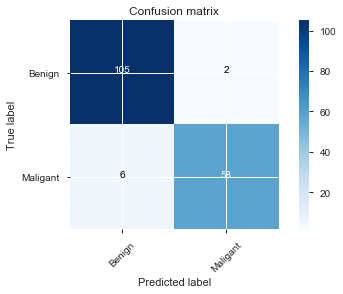

In [235]:
# Compute confusion matrix to evaluate the accuracy of a classification    
cnf_matrix = confusion_matrix(y_test, y_pred) 
np.set_printoptions(precision=2)

# Plot the confusion matrix 
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ["Benign", "Maligant"])
plt.show()

In [230]:
#################################### Apply the Logistic Regression Model ####################################

# After being fitted, the model can then be used to predict the class of samples:
print('The 1st instance is predicted to belong to class:', clf.predict(df.iloc[[1], 2:]))

# Alternatively, the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:
print('The probabilities of belonging to each one of the classes are estimated as:', clf.predict_proba(df.iloc[[1], 2:]))


The 1st instance is predicted to belong to class: [1]
The probabilities of belonging to each one of the classes are estimated as: [[0. 1.]]


# Cross-Validation

In [231]:
#################################### Logistic Regression with Cross Validation ####################################
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Fit model to all the data
clf_lr = linear_model.LogisticRegression(C=1e7)

# Accuracy
scores=cross_val_score(clf_lr,X , y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# F-1 scores
scores_f1=cross_val_score(clf_lr, X, y, cv=10, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))
print(scores_f1)

Accuracy: 0.96 (+/- 0.03)
[0.94 0.94 0.96 0.96 0.97]
F1-score: 0.95 (+/- 0.04)
[0.96 0.92 0.92 0.96 0.96 0.98 0.96 0.94 0.96 0.96]


In [233]:
########################### k-NN Cross Validation ###############################3
knn = neighbors.KNeighborsClassifier(n_neighbors = 3, #n_neighbors is the k in the kNN
                           p = 2, # p = 2 for euclidean_distance
                           metric='minkowski') # metric : string or callable, default ‘minkowski’
                           # the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.

# Accuracy
scores=cross_val_score(knn,X , y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

# F-1 scores
scores_f1=cross_val_score(knn, X, y, cv=10, scoring='f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))
print(scores_f1)

Accuracy: 0.92 (+/- 0.05)
[0.88 0.92 0.95 0.94 0.91]
F1-score: 0.92 (+/- 0.07)
[0.91 0.84 0.89 0.94 0.94 0.94 0.96 0.94 0.91 0.92]


# Learning Curve

In [214]:
################################## Define function that plots Learning Curves ##################################

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    # Visualization patamters
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    # Estimate train and test score for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) # learning_curve Determines cross-validated 
                                                                        # training and test scores for different 
                                                                        # training set sizes.

    # Estimate statistics of train and test scores (mean, std)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    # Fill the area around the mean scores with standard deviation info
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # Fill for train set scores

    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")  # Fill for test set scores
    
    # Visualization parameters that will allow us to distinguish train set scores from test set scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

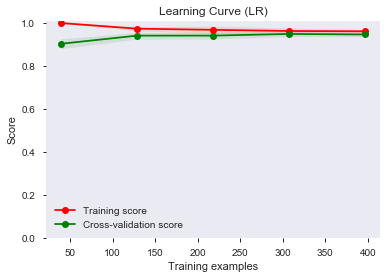

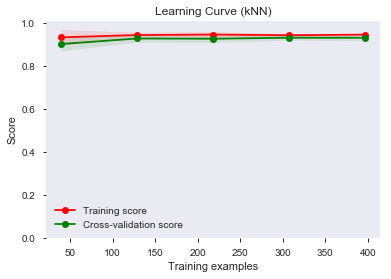

In [234]:
###################################### Plot Learning Curves (LR and kNN) #######################################

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors

title = "Learning Curve (LR)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

title = "Learning Curve (kNN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator = neighbors.KNeighborsClassifier() #n_neighbors=
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()